Importing Face Mask Dataset

In [1]:
# extracting the compessed Dataset
# from zipfile import ZipFile
# dataset = 'face-mask-dataset.zip'

# with ZipFile(dataset,'r') as zip:
#   zip.extractall()
#   print('The dataset is extracted')

**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
with_mask_files = os.listdir('with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [5]:
without_mask_files = os.listdir('without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [6]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [7]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [8]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

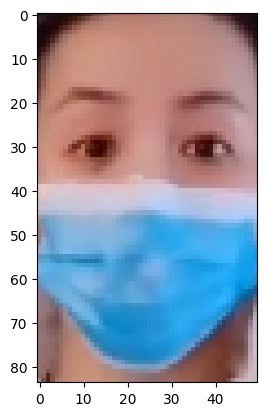

In [11]:
# displaying with mask image
img = mpimg.imread('with_mask/with_mask_15.jpg')
imgplot = plt.imshow(img)
plt.show()

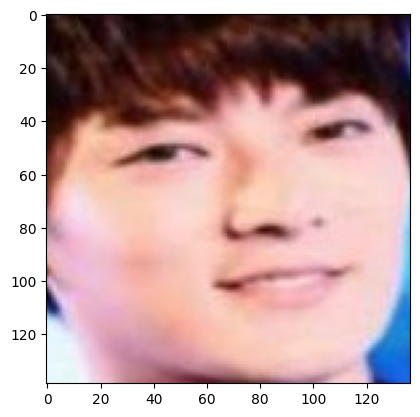

In [12]:
# displaying without mask image
img = mpimg.imread('without_mask/without_mask_25.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Pre-Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [13]:
# convert images to numpy arrays+

with_mask_path = 'with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
type(data)

list

In [15]:
len(data)

7553

In [16]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [23]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [28]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [31]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [32]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=7)

Epoch 1/7
170/170 [==============================] - 140s 819ms/step - loss: 0.4649 - acc: 0.7988 - val_loss: 0.2528 - val_acc: 0.8893
Epoch 2/7
170/170 [==============================] - 122s 716ms/step - loss: 0.2815 - acc: 0.8867 - val_loss: 0.2514 - val_acc: 0.8959
Epoch 3/7
170/170 [==============================] - 120s 704ms/step - loss: 0.2411 - acc: 0.9040 - val_loss: 0.2230 - val_acc: 0.9140
Epoch 4/7
170/170 [==============================] - 116s 680ms/step - loss: 0.2055 - acc: 0.9152 - val_loss: 0.1975 - val_acc: 0.9289
Epoch 5/7
170/170 [==============================] - 123s 723ms/step - loss: 0.1798 - acc: 0.9239 - val_loss: 0.2005 - val_acc: 0.9355
Epoch 6/7
170/170 [==============================] - 124s 728ms/step - loss: 0.1412 - acc: 0.9415 - val_loss: 0.2461 - val_acc: 0.9207
Epoch 7/7
170/170 [==============================] - 125s 736ms/step - loss: 0.1366 - acc: 0.9476 - val_loss: 0.2313 - val_acc: 0.9339


**Model Evaluation**

In [33]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 7s 147ms/step - loss: 0.1795 - acc: 0.9279
Test Accuracy = 0.9278623461723328


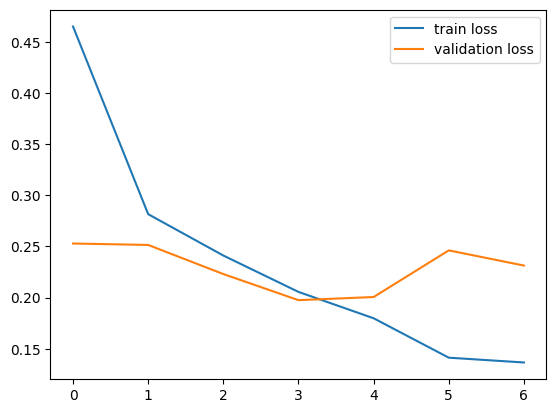

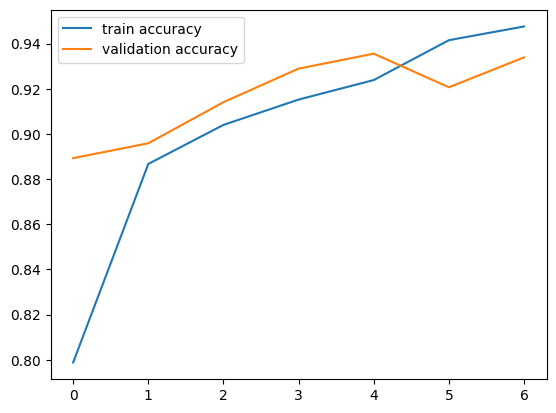

In [34]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [36]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

input_image = cv2.imread('download.jpeg')


input_image_rgb = cv2.cvtColor(input_image , cv2.COLOR_BGR2RGB)


faces = face_cascade.detectMultiScale(input_image_rgb, scaleFactor=1.1, minNeighbors=5)

# Iterate through the detected faces
for (x, y, w, h) in faces:
    
    cv2.rectangle(input_image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Extract the face ROI (Region of Interest)
    face_roi = input_image_rgb[y:y + h, x:x + w]

    
    resized_face = cv2.resize(face_roi, (128, 128)) 
    normalized_face = resized_face / 255.0  
    input_data = np.expand_dims(normalized_face, axis=0) 

    
    mask_prediction = model.predict(input_data)
    mask_label = np.argmax(mask_prediction)

    
    if mask_label == 1:
        cv2.putText(input_image_rgb, 'Mask', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    else:
        cv2.putText(input_image_rgb, 'No Mask', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)


cv2.imshow('Face Mask Detection', input_image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()



1/1 [==============================] - 0s 161ms/step


In [52]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

input_image = cv2.imread('testing.jpg')


input_image_rgb = cv2.cvtColor(input_image , cv2.COLOR_BGR2RGB)


faces = face_cascade.detectMultiScale(input_image_rgb, scaleFactor=1.1, minNeighbors=5)

# Iterate through the detected faces
for (x, y, w, h) in faces:
    
    cv2.rectangle(input_image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Extract the face ROI (Region of Interest)
    face_roi = input_image_rgb[y:y + h, x:x + w]

    
    resized_face = cv2.resize(face_roi, (128, 128)) 
    normalized_face = resized_face / 255.0  
    input_data = np.expand_dims(normalized_face, axis=0) 

    
    mask_prediction = model.predict(input_data)
    mask_label = np.argmax(mask_prediction)

    
    if mask_label == 1:
        cv2.putText(input_image_rgb, 'Mask', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    else:
        cv2.putText(input_image_rgb, 'No Mask', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)


cv2.imshow('Face Mask Detection', input_image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()



1/1 [==============================] - 0s 48ms/step


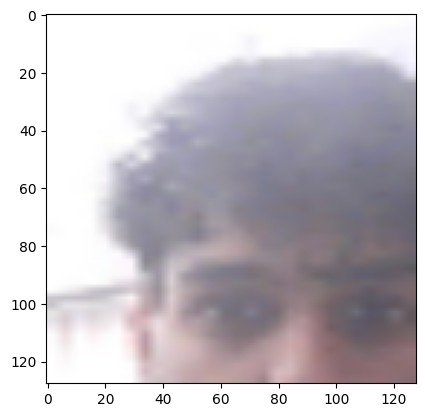

(128, 128, 3)
1/1 [==============================] - 0s 75ms/step
[[0.48630527 0.4720917 ]]
0
The person in the image is not wearing a mask


In [47]:
input_image_path = 'WIN_20231201_14_30_44_Pro.jpg'

input_image = cv2.imread(input_image_path)


#cv2.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_resized = input_image_resized[30//2:-126//2,100//2:-100//2]
input_image_resized = cv2.resize(input_image_resized, (128,128))
input_image_resized = cv2.cvtColor(input_image_resized,cv2.COLOR_BGR2RGB)

plt.imshow(input_image_resized)
plt.show()
print(input_image_resized.shape)


input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [44]:
import cv2
from tensorflow.keras.models import load_model

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        resized_face = cv2.resize(face_roi, (128, 128))
        normalized_face = resized_face / 255.0
        input_data = np.expand_dims(cv2.cvtColor(resized_face, cv2.COLOR_GRAY2RGB), axis=0)

        mask_prediction = mask_model.predict(input_data)
        mask_label = np.argmax(mask_prediction)
        if mask_label == 1:
            label = "mask"
        else:
            label = "no mask"

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow('Face Mask Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 29ms/step


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

# Read the input image using OpenCV
input_image = cv2.imread(input_image_path)

# Check if the image was read successfully
if input_image is None:
    print('Error: Could not read the image.')
else:
    # Resize the input image to the desired dimensions (128x128)
    input_image_resized = cv2.resize(input_image, (128, 128))

    # Normalize the image by scaling pixel values to the range [0, 1]
    input_image_scaled = input_image_resized / 255.0

    # Reshape the image to match the expected input shape of the model
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    # Assuming you have a pre-trained model named 'model'
    input_prediction = model.predict(input_image_reshaped)

    # Assuming your model outputs two classes, where class 1 represents 'mask' and class 0 represents 'no mask'
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask.')
    else:
        print('The person in the image is not wearing a mask.')

1/1 [==============================] - 0s 33ms/step
The person in the image is not wearing a mask.
